Binary Classification on the California Housing Dataset:

Classify the predicted House Rates which are below 265000 and above 265000

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import  norm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import feature_column
import matplotlib.pyplot as plt

print("All the Modules have been Imported")

All the Modules have been Imported


In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))
print("Import the train and test Dataset and shuffle the dataset to prevent model from Overfitting")

Import the train and test Dataset and shuffle the dataset to prevent model from Overfitting


Now we will Normalize the dataset by converting raw values with it's label to its Z-score.

In [3]:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std
# Z-score = raw value - mean/ Standard Deviation.
print("The Raw value with its label has been of train Dataset has been Normalised")

test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std
print("The Raw value with its label has been of test Dataset has been Normalised")

The Raw value with its label has been of train Dataset has been Normalised
The Raw value with its label has been of test Dataset has been Normalised


In [4]:
# lets look at the Normalised dataset:
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6367,0.649377,-0.718288,0.588757,0.394200,0.696535,1.064967,0.745806,-0.020322,0.293999
12230,-0.951488,1.368418,1.542126,-0.712249,-0.323632,-0.438709,-0.429683,-1.434776,-1.223455
9442,0.155652,0.063057,0.588757,-0.142969,0.276606,0.649409,0.282892,-1.194387,-1.293292
8405,0.544647,-0.732324,-0.205717,1.804326,2.964628,1.313257,2.992759,0.480790,2.523630
13130,-1.155960,0.755507,-1.159087,2.078186,0.974116,1.178222,1.034477,2.317903,1.611425


In [5]:
train_df_norm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04
mean,-2.050434e-13,-6.603550e-15,-2.045423e-17,-7.788970e-17,-1.202812e-16,8.660393e-17,-4.569180e-17,-1.199255e-14,5.261151e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.387778e+00,-1.443488e+00,-2.191904e+00,-1.211802e+00,-1.277370e+00,-1.242819e+00,-1.300897e+00,-1.773271e+00,-1.658007e+00
25%,-1.111076e+00,-7.931470e-01,-8.412970e-01,-5.420611e-01,-5.751154e-01,-5.571915e-01,-5.701172e-01,-6.903014e-01,-7.578726e-01
50%,5.346729e-01,-6.434282e-01,3.262486e-02,-2.370078e-01,-2.500853e-01,-2.287522e-01,-2.398360e-01,-1.776469e-01,-2.319369e-01
75%,7.790417e-01,9.800853e-01,6.682044e-01,2.328431e-01,2.582190e-01,2.538880e-01,2.705395e-01,4.629714e-01,4.974756e-01
max,2.619288e+00,2.959181e+00,1.859916e+00,1.619000e+01,1.401091e+01,2.984043e+01,1.451359e+01,5.825791e+00,2.523630e+00


The Normalised dataset lies Roughly between -2 and 2.
And now lets create Binary Labels

In [6]:
threshold = 265000 #This is the 75% percentile for the median house values. And can be considered for Classification.
train_df_norm["median_house_value_is_high"] = (train_df["median_house_value"]>threshold).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df["median_house_value"]>threshold).astype(float)

train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_is_high
6367,0.649377,-0.718288,0.588757,0.394200,0.696535,1.064967,0.745806,-0.020322,0.293999,0.0
12230,-0.951488,1.368418,1.542126,-0.712249,-0.323632,-0.438709,-0.429683,-1.434776,-1.223455,0.0
9442,0.155652,0.063057,0.588757,-0.142969,0.276606,0.649409,0.282892,-1.194387,-1.293292,0.0
8405,0.544647,-0.732324,-0.205717,1.804326,2.964628,1.313257,2.992759,0.480790,2.523630,1.0
13130,-1.155960,0.755507,-1.159087,2.078186,0.974116,1.178222,1.034477,2.317903,1.611425,1.0


Sum of Normalized Value is 0 or Roughly 0

longitude                       -0.0
latitude                        -0.0
housing_median_age              -0.0
total_rooms                     -0.0
total_bedrooms                  -0.0
population                       0.0
households                      -0.0
median_income                   -0.0
median_house_value               0.0
median_house_value_is_high    4247.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015ED8D80CC8>,
      dtype=object)

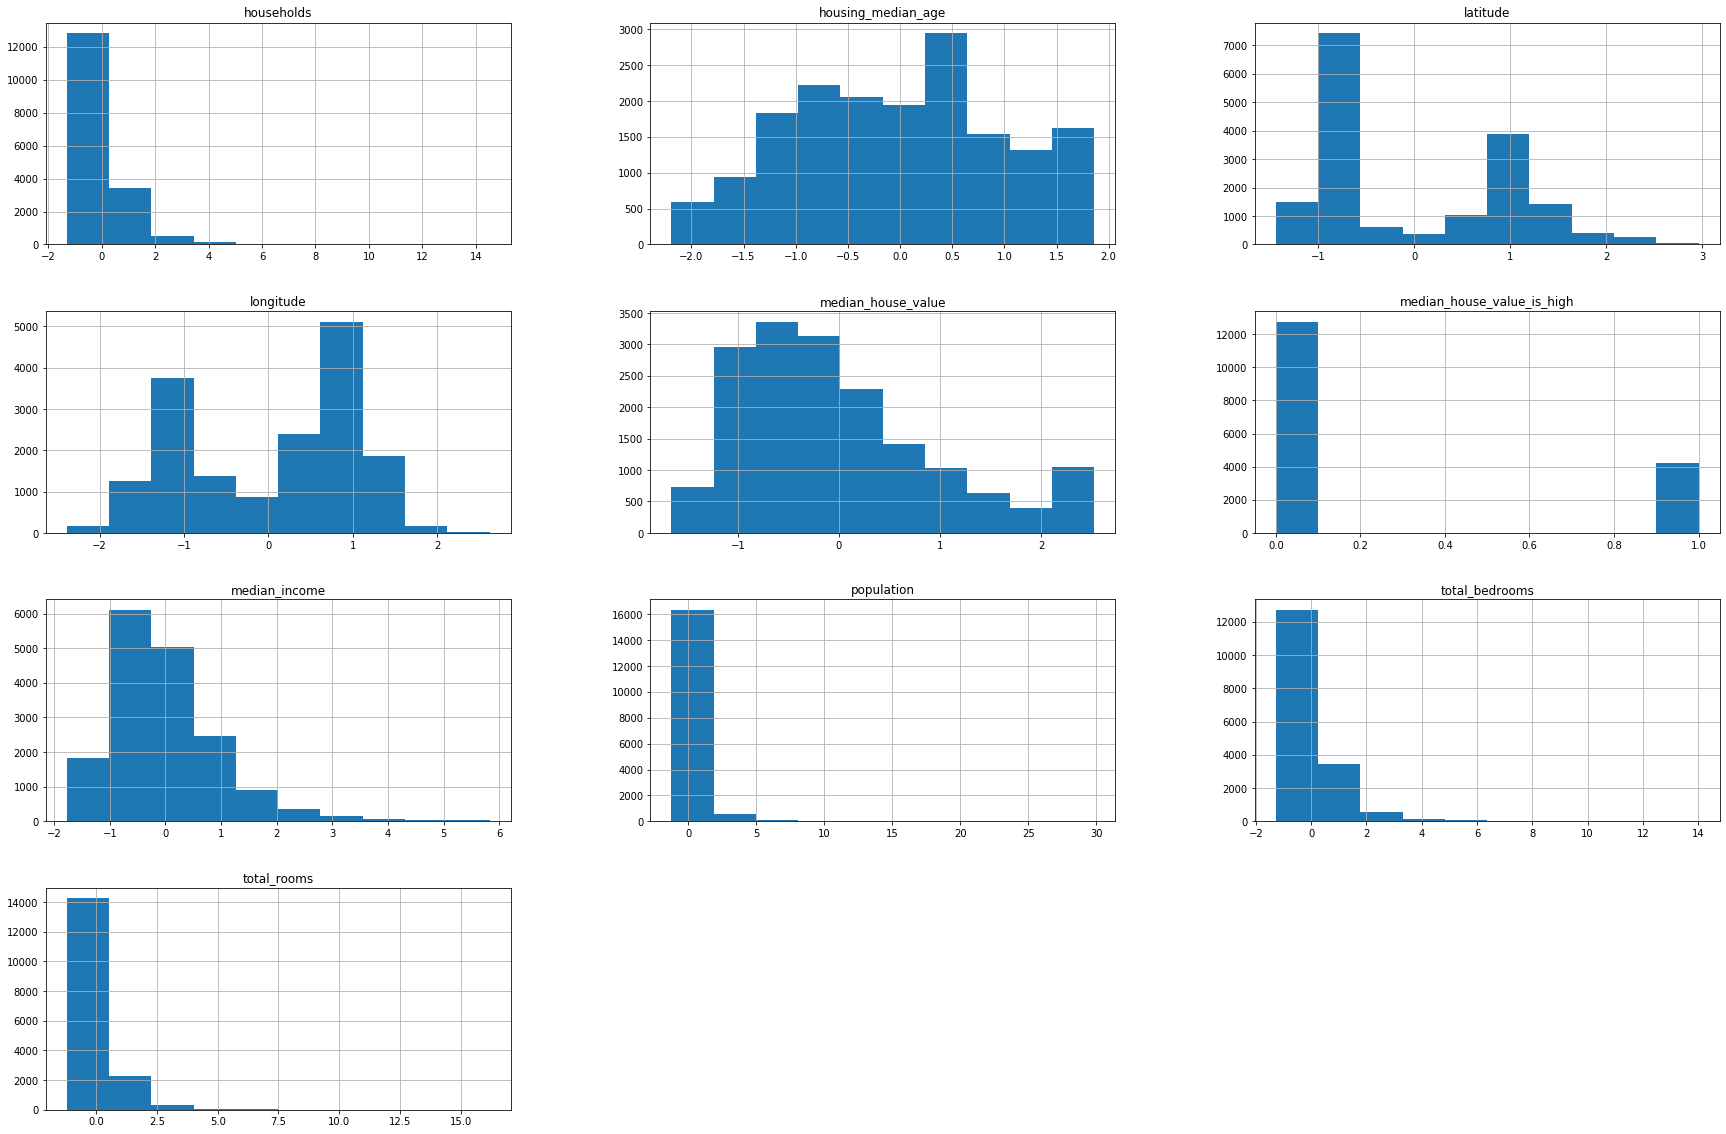

In [7]:
print(round(train_df_norm.sum()))
train_df_norm.hist(figsize=(30,20))

This is normal distribution just for the Representation for the Understanding of how the Data is Scaled. 
And it Roughly ressembles each plot previous to this Figure

Sum of Normalization is equal to -0.0


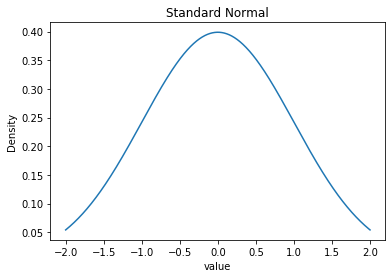

In [8]:
domain = np.linspace(-2,2,1000)
plt.plot(domain, norm.pdf(domain,0,1))
plt.title("Standard Normal")
plt.xlabel("value")
plt.ylabel("Density")
num = str(round(sum(domain)))
print("Sum of Normalization is equal to "+num)
plt.show()

Represent features in feature Columns:

In [9]:
feature_columns = []

median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

tr = tf.feature_column.numeric_column("total_rooms")
feature_columns.append(tr)

print(median_income)
print(tr)

NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [10]:
feature_layer = layers.DenseFeatures(feature_columns)

feature_layer(dict(train_df_norm))

<tf.Tensor: id=26, shape=(17000, 2), dtype=float32, numpy=
array([[-0.02032229,  0.3942002 ],
       [-1.4347764 , -0.7122487 ],
       [-1.1943874 , -0.1429688 ],
       ...,
       [-1.3064852 , -1.0838174 ],
       [ 0.6521592 ,  0.04281553],
       [-0.01340461,  0.01575065]], dtype=float32)>

Create a Model Function:

In [11]:
#Function to Create a Model
def create_model(my_learning_rate, feature_layer, my_metrics):


  model = tf.keras.models.Sequential()

  
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

      
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model

print("Model has been created")

Model has been created


In [12]:
#Function to train the model
def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):

  
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  
  epochs = history.epoch

  
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Function to train the Model has been Defined")

Function to train the Model has been Defined


In [13]:
def plot_curve(epochs, hist, list_of_metrics):
  
    

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
        
print("plot_curve function has been created")

plot_curve function has been created


Train on 17000 samples
Epoch 1/16
17000/17000 [==============================] - 5s 313us/sample - loss: 0.4781 - accuracy: 0.6942
Epoch 2/16
17000/17000 [==============================] - 4s 262us/sample - loss: 0.4017 - accuracy: 0.8012
Epoch 3/16
17000/17000 [==============================] - 5s 285us/sample - loss: 0.3970 - accuracy: 0.8079
Epoch 4/16
17000/17000 [==============================] - 5s 319us/sample - loss: 0.3967 - accuracy: 0.8093
Epoch 5/16
17000/17000 [==============================] - 4s 258us/sample - loss: 0.3967 - accuracy: 0.8092
Epoch 6/16
17000/17000 [==============================] - 5s 319us/sample - loss: 0.3967 - accuracy: 0.8092
Epoch 7/16
17000/17000 [==============================] - 5s 282us/sample - loss: 0.3967 - accuracy: 0.8098
Epoch 8/16
17000/17000 [==============================] - 5s 307us/sample - loss: 0.3967 - accuracy: 0.8098
Epoch 9/16
17000/17000 [==============================] - 6s 346us/sample - loss: 0.3968 - accuracy: 0.8089
Epoch

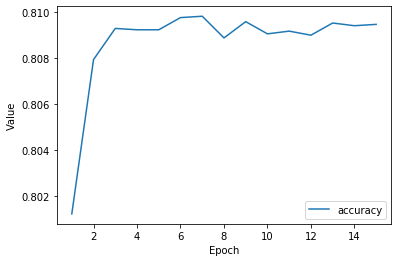

In [14]:
#These are Hyperparameter to build and Train the model and plot it Metrics:
learning_rate = 0.001
epochs = 16
batch_size = 10 
label_name = "median_house_value_is_high"
classification_threshold = 0.35


METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]


my_model = create_model(learning_rate, feature_layer, METRICS)


epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

Let's  Evaluate the model against the test set:

In [15]:


features = {name:np.array(value) for name,value in test_df_norm.items()}
label = np.array(features.pop(label_name))
valu = my_model.evaluate(x = features, y = label, batch_size = batch_size)
print("-----------------------------------------------------------------------")
print("Results are: ")
print("-----------------------------------------------------------------------")
print("The Accuracy on the Test set is: "+str(valu[1]))
print("The Loss on the Test set is: "+str(valu[0]))

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

The Model was 80% good. 
But the median_house_value_is_high  is False would be 75% Accurate.
Accuracy can a poor metrics to judge performance of the Classification Model.
Let's look at the other metrics Precision and Recall.

Train on 17000 samples
Epoch 1/16
17000/17000 [==============================] - 2s 93us/sample - loss: 0.4744 - accuracy: 0.6898 - precision: 0.4279 - recall: 0.7177
Epoch 2/16
17000/17000 [==============================] - 1s 35us/sample - loss: 0.3972 - accuracy: 0.8084 - precision: 0.6175 - recall: 0.6127
Epoch 3/16
17000/17000 [==============================] - 1s 39us/sample - loss: 0.3970 - accuracy: 0.8093 - precision: 0.6191 - recall: 0.6150
Epoch 4/16
17000/17000 [==============================] - 0s 26us/sample - loss: 0.3969 - accuracy: 0.8091 - precision: 0.6189 - recall: 0.6141
Epoch 5/16
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3970 - accuracy: 0.8091 - precision: 0.6193 - recall: 0.6124
Epoch 6/16
17000/17000 [==============================] - 1s 31us/sample - loss: 0.3968 - accuracy: 0.8088 - precision: 0.6183 - recall: 0.6136
Epoch 7/16
17000/17000 [==============================] - 0s 28us/sample - loss: 0.3970 - accuracy: 0.8099 - prec

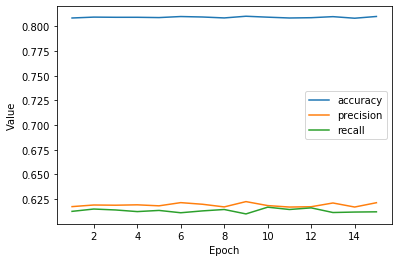

In [16]:
#Hyperparameters with Metrics Accuracy, Precision and recall
learning_rate = 0.01
epochs = 16
batch_size = 100
classfication_threshold = 0.35
label_name = "median_house_value_is_high"

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                    threshold = classfication_threshold),
     tf.keras.metrics.Precision(thresholds = classification_threshold,     
                                name='precision'),
                                
     tf.keras.metrics.Recall(thresholds = classfication_threshold,
                            name ='recall')
]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df_norm, epochs, label_name, batch_size)

list_of_metrics_to_plot = ['accuracy','precision','recall']
plot_curve(epochs, hist,list_of_metrics_to_plot)

Let's experiment with modifications in Classification Threshold:

Train on 17000 samples
Epoch 1/16
17000/17000 [==============================] - 2s 89us/sample - loss: 0.7410 - accuracy: 0.5970 - precision: 0.0898 - recall: 0.0671
Epoch 2/16
17000/17000 [==============================] - 1s 29us/sample - loss: 0.4268 - accuracy: 0.8205 - precision: 0.8121 - recall: 0.3664
Epoch 3/16
17000/17000 [==============================] - 0s 28us/sample - loss: 0.3969 - accuracy: 0.8319 - precision: 0.7366 - recall: 0.5091
Epoch 4/16
17000/17000 [==============================] - 0s 25us/sample - loss: 0.3970 - accuracy: 0.8323 - precision: 0.7339 - recall: 0.5157
Epoch 5/16
17000/17000 [==============================] - 0s 29us/sample - loss: 0.3969 - accuracy: 0.8321 - precision: 0.7356 - recall: 0.5117
Epoch 6/16
17000/17000 [==============================] - 0s 28us/sample - loss: 0.3968 - accuracy: 0.8321 - precision: 0.7340 - recall: 0.5140
Epoch 7/16
17000/17000 [==============================] - 0s 21us/sample - loss: 0.3969 - accuracy: 0.8329 - prec

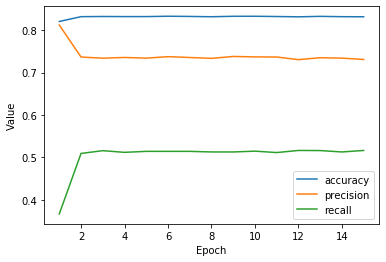

In [17]:
#Modifying the Classification Threshold:
learninig_rate = 0.001
epochs = 16
batch_size = 100
classification_threshold = 0.47

Metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                     threshold = classification_threshold),
    tf.keras.metrics.Precision(name = 'precision',
                               thresholds = classification_threshold),
    tf.keras.metrics.Recall(name='recall',
                            thresholds = classification_threshold)
]

my_model = create_model(learning_rate, feature_layer,Metrics)

epochs, hist = train_model(my_model,train_df_norm, epochs, label_name, batch_size)

list_of_metrics = ['accuracy','precision','recall']

plot_curve(epochs, hist,list_of_metrics)

Let's judge the models performance by using a Metric called AUC(Area under Receiver Operating Curve):

Train on 17000 samples
Epoch 1/16
17000/17000 [==============================] - 1s 87us/sample - loss: 0.5891 - AUC: 0.8028
Epoch 2/16
17000/17000 [==============================] - 0s 29us/sample - loss: 0.5393 - AUC: 0.8129
Epoch 3/16
17000/17000 [==============================] - 0s 26us/sample - loss: 0.4978 - AUC: 0.8201
Epoch 4/16
17000/17000 [==============================] - 1s 30us/sample - loss: 0.4647 - AUC: 0.8255
Epoch 5/16
17000/17000 [==============================] - 0s 28us/sample - loss: 0.4388 - AUC: 0.8299
Epoch 6/16
17000/17000 [==============================] - 1s 30us/sample - loss: 0.4200 - AUC: 0.8335
Epoch 7/16
17000/17000 [==============================] - 1s 30us/sample - loss: 0.4084 - AUC: 0.8352
Epoch 8/16
17000/17000 [==============================] - 0s 28us/sample - loss: 0.4020 - AUC: 0.8366
Epoch 9/16
17000/17000 [==============================] - 1s 33us/sample - loss: 0.3993 - AUC: 0.8365
Epoch 10/16
17000/17000 [==============================] - 

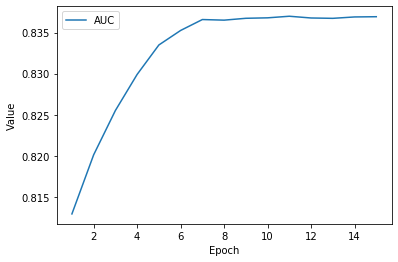

In [18]:
#Evaluating the Performance of the model using the Metric AUC
learning_rate = 0.001
epochs = 16
batch_size = 100


METRICS = [
    tf.keras.metrics.AUC(num_thresholds = 100, name = 'AUC'),
]

my_model = create_model(learning_rate,feature_layer,METRICS)

epochs, hist = train_model(my_model, train_df_norm,epochs,label_name,batch_size)

metric = ['AUC']

plot_curve(epochs,hist,metric)